# PS4 12132243

# 1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr

In [175]:
# read csv file and saved as dataframe 
df = pd.read_csv("usgs_earthquakes.csv")

# select top50 mag
big_mag = df.sort_values(by = 'mag',ascending = False).head(50).reset_index()
mag = big_mag['mag'].to_numpy()
lat = big_mag['latitude'].to_numpy()
lon = big_mag['longitude'].to_numpy()


# create a figure
fig = plt.figure(figsize=(12, 6),dpi=200)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude = 180))

# make the map global rather than have it zoom in to
ax.set_global()
ax.stock_img()

# add scatter
a = ax.scatter(lon,lat,c=mag,cmap = 'Reds', edgecolors='black',transform=ccrs.PlateCarree())

# add title
plt.title("Top 50 Earthquake of 2014")

# Add a color bar
colorbar = plt.colorbar(a,shrink=0.6)
colorbar.set_label('magnitude')

# show plot
plt.show()

# 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

#### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [198]:
# load the GEOSCarb data
carb = xr.open_dataset('GEOSCarb_CASAGFED3v3_Flux.Monthly.x720_y360.2017.nc')
NPP = carb.NPP.mean(dim = 'time')

# creat a figure
plt.figure(figsize=(12,6), dpi=300)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Plot the NPP with colorbar
NPP.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=0.2,cmap='Reds', cbar_kwargs={'shrink': 0.5})

# add title
plt.title('Global annual NPP')

# mask ocean
ax.add_feature(cfeature.OCEAN, zorder=1)

# Add gridlines, x-axis, y-axis labels and ticks
gridlines = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linewidth=0.5, color='black')
gridlines.top_labels = False
gridlines.right_labels = False

# add legend
x1 = [0,1]
plt.fill_between(x1, 0, 1, color='blue', label='Ocean')
plt.legend()

# add text box
ax.text(0, 70,'Arctic Ocean', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', fc='blue', ec='black',lw=0.5 ,alpha=0.7))
ax.text(-170, 0,'Pacific Ocean', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', fc='blue', ec='black',lw=0.5 ,alpha=0.7))
ax.text(-60, 30,'Atlantic Ocean', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', fc='blue', ec='black',lw=0.5 ,alpha=0.7))
ax.text(60, 0,'Indian Ocean', fontsize=8,
             bbox=dict(boxstyle='round,pad=0.3', fc='blue', ec='black',lw=0.5 ,alpha=0.7))

Text(60, 0, 'Indian Ocean')

#### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

Text(105, 35, 'China')

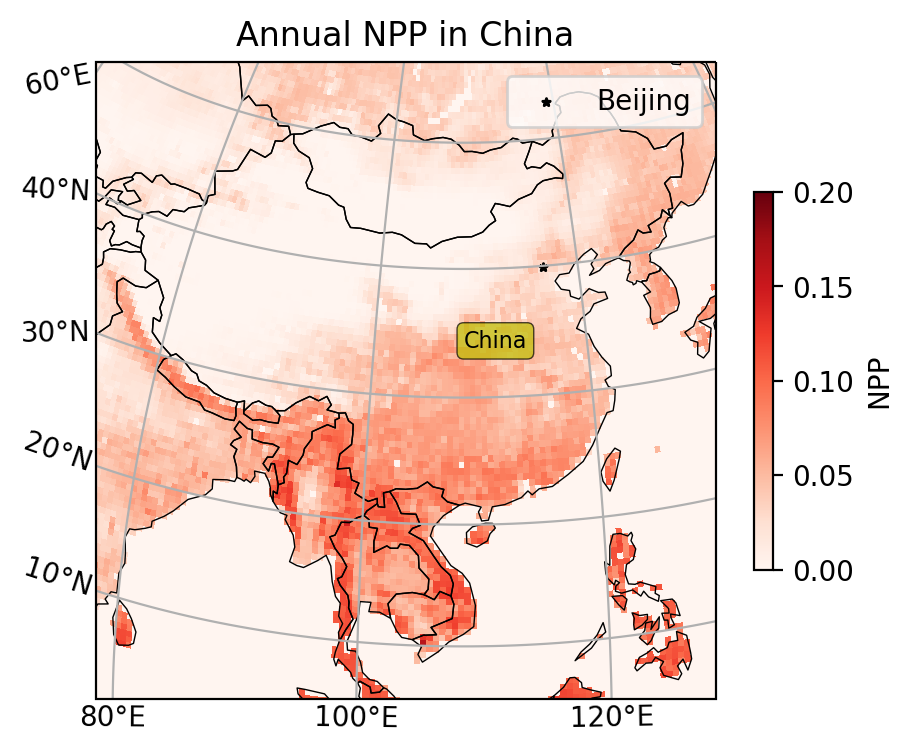

In [212]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=200)

# Set Orthographic projection style
central_lon, central_lat = 108.4, 33.9 # xian
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-30, central_lon+20, central_lat-30, central_lat+20]
ax.set_extent(extent)

# Add features to axes using methods
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# add gridlines, x-axis, y-axis labels and ticks
gridlines = ax.gridlines(draw_labels=True)
gridlines.top_labels = False
gridlines.right_labels = False

# Plot the NPP with colorbar
NPP.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=0.2,cmap='Reds', cbar_kwargs={'shrink': 0.5})

# add title
plt.title('Annual NPP in China')

# Label Taiwan with text box 
beijing_lon = 116.46
beijing_lat = 39.92
ax.scatter(beijing_lon, beijing_lat,transform=ccrs.PlateCarree(), marker='*', color='black',s=8, label='Beijing')
ax.legend()

# add text box
ax.text(105, 35,'China', fontsize=8,bbox=dict(boxstyle='round,pad=0.3', fc='y', ec='black',lw=0.5 ,alpha=0.7))

### collaborations:
1.Section 09.ipynb

2.https://www.cnblogs.com/ljwgis/p/12981101.html

3.the cartopy website